# 1. Hashing (Hash Function)
---

> Hashing is a technique of mapping a large set of arbitrary data(keys) to tabular indexes using a hash function. 

The overall process consists of providing raw data as input to a hashing mechanism, which processes it through a particular hashing function and **generates the hash(index) as output**.

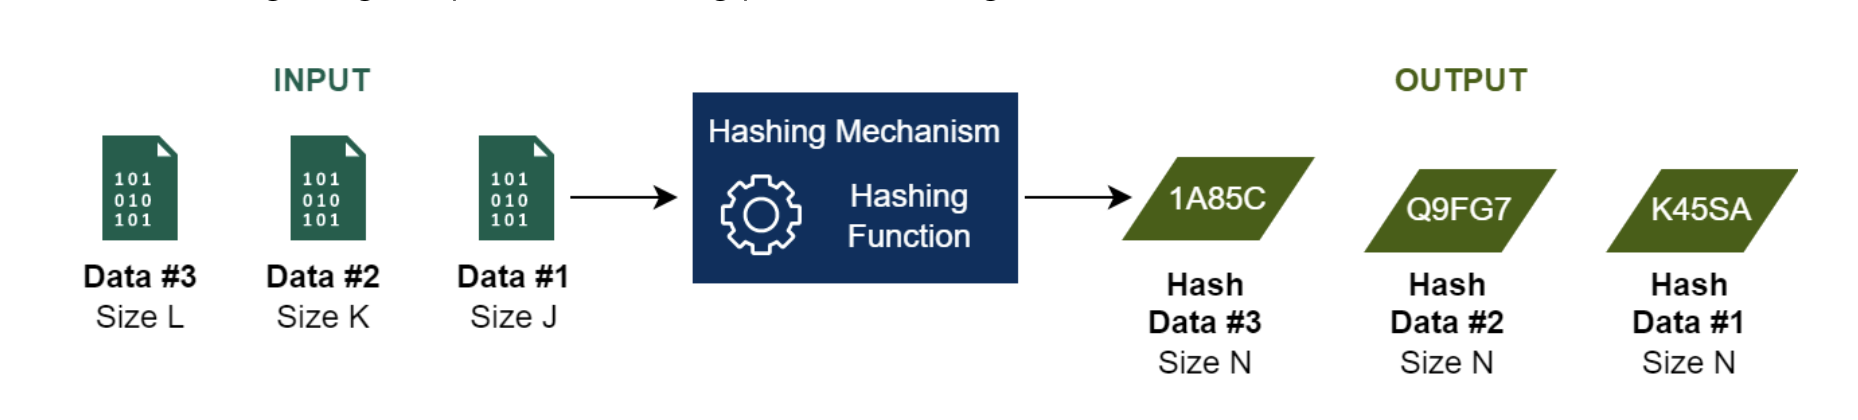

## 1.2. Collision

In short, a collision happens when different data inputs result in the **same hash** after being processed by a hashing mechanism. However, we should note here that **collisions are not a problem but an intrinsic characteristic of the hashing mechanisms**.


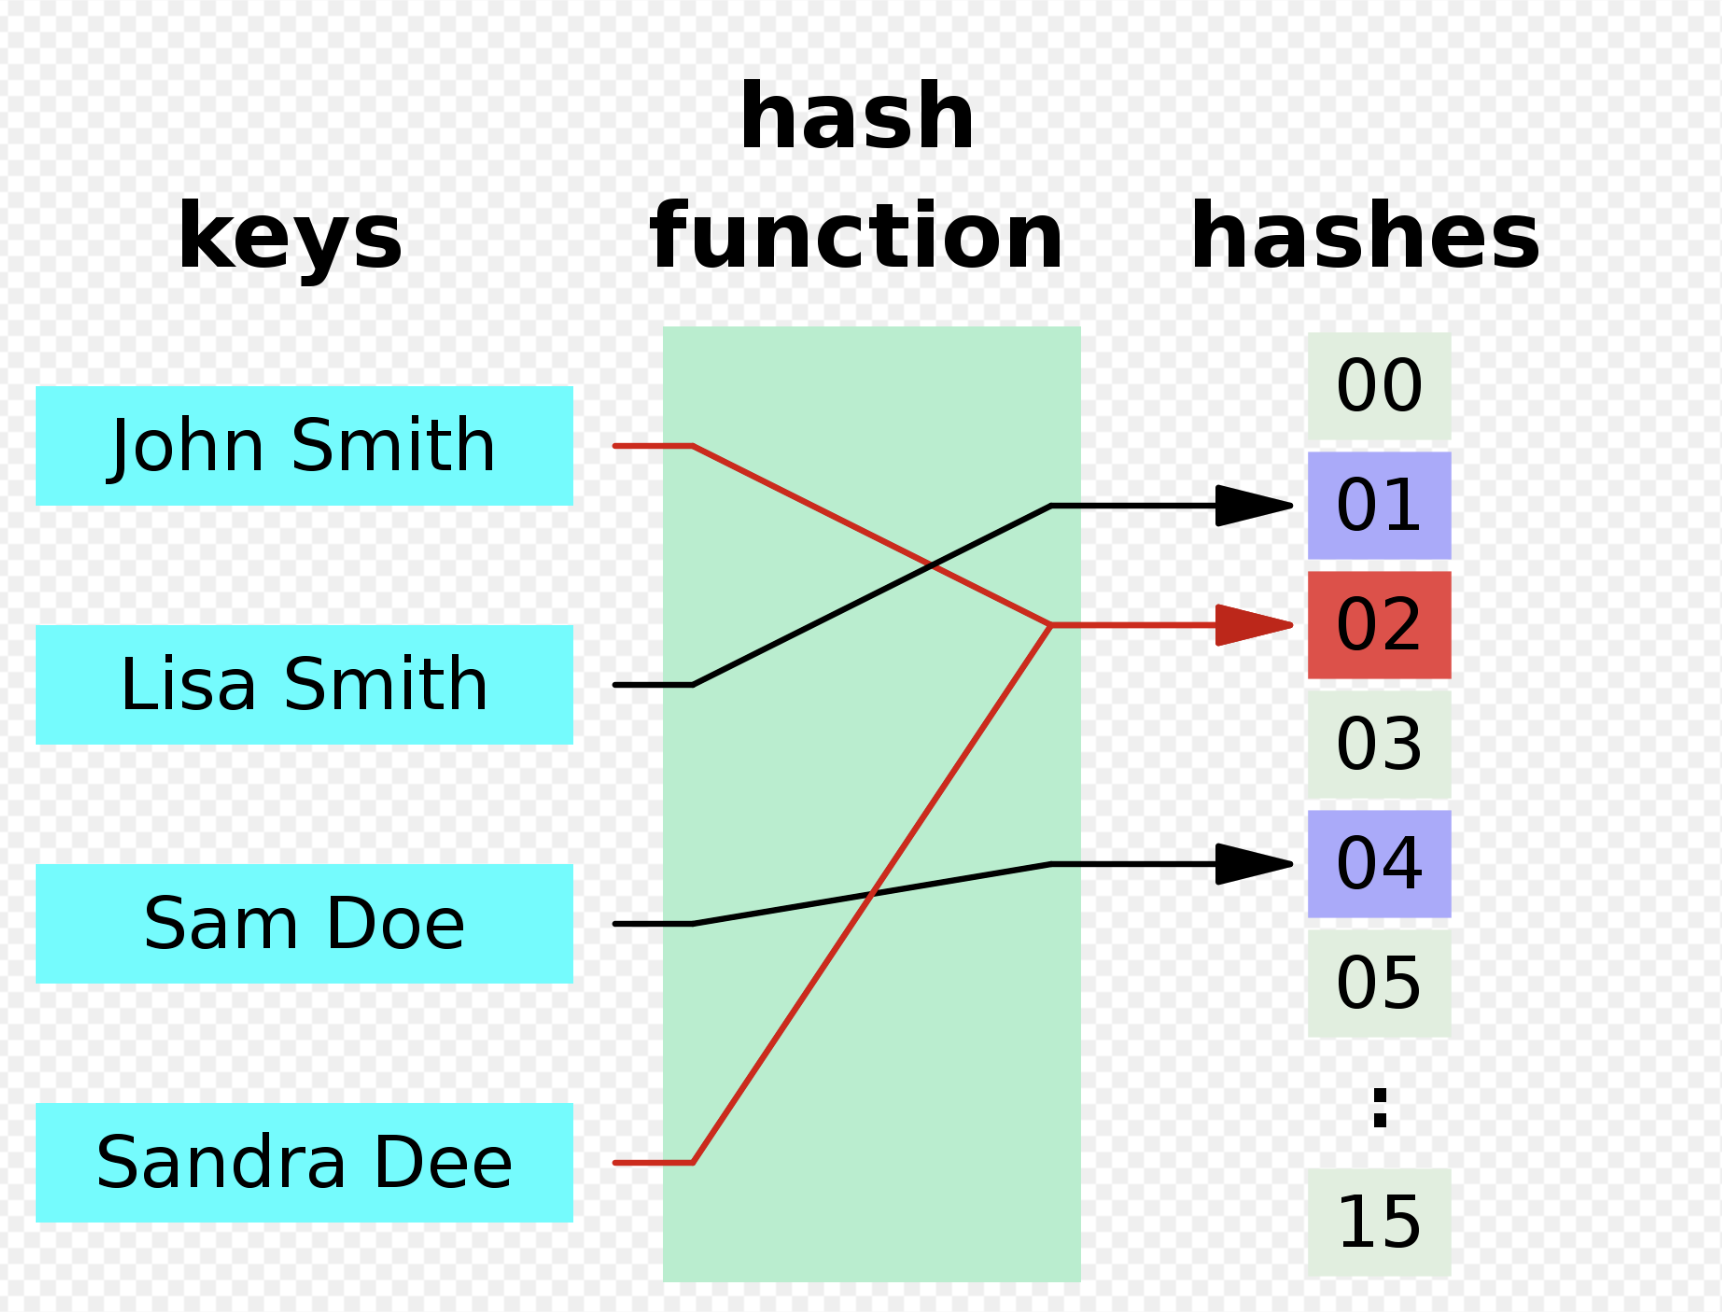

A **hash function** that maps names to integers from 0 to 15. There is a **collision** between keys "John Smith" and "Sandra Dee".

# 2. Good Hash Functions
----

A good hash function may not prevent the collisions completely however it can reduce the number of collisions.

## 2.1. Division Method

If `k` is a key and `m` is the length of the hash table, the hash function `h()` is calculated as:

```
h(k) = k mod m
```

## 2.2. 为什么 HashMap 的数组长度要取 2 的整次方. 

取模运算(**Modulo Operation**)在实际实现并不是用`%`运算符, 而是用`&`来间接实现取模运算. 这是因为 `&` 运算比 `%` 更加高效，并且当 `b` 为 2 的 n 次方时，存在下面这样一个公式:

```
a % b = a & (b-1)
```

这也正好解释了为什么 HashMap 的数组长度要取 2 的整次方. 

> 又因为`length-1`正好相当于一个“低位掩码”——这个掩码的**低位最好全是 1**，这样 `&` 操作才有意义，否则结果就肯定是 0，那么 `&` 操作就没有意义了。

2 的整次幂是偶数，`偶数-1` 是奇数，奇数的二进制最后一位是 1，保证了 `hash &(length-1)` 的最后一位可能为 0，也可能为 1（这取决于 hash 的值），即 `&` 运算后的结果可能为偶数，也可能为奇数，这样便可以保证哈希值的均匀性。

而如果 `length` 为奇数的话，很明显 `length-1` 为偶数，它的最后一位是 0，这样 `hash & (length-1)` 的最后一位肯定为 0，即只能为偶数，这样任何 hash 值都只会被散列到数组的偶数下标位置上，这便浪费了近一半的空间.


# 3. HashMap in Java
---

Arrays and ArrayList store items as an ordered collection, and you have to access them with an index number (`int` type). A HashMap however, store items in "key/value" pairs, and you can access them by an index of another type (e.g. a `String`).

```java
public V get(Object key);

public V put(K key, V value);

public V remove(Object key);

public Set<K> keySet();

public Collection<V> values();

// Print keys
for (String i : capitalCities.keySet()) {
  System.out.println(i);
}

// Print values
for (String i : capitalCities.values()) {
  System.out.println(i);
}

// Print keys and values
for (String i : capitalCities.keySet()) {
  System.out.println("key: " + i + " value: " + capitalCities.get(i));
}
```

看一下HashMap的原型

```java
public class HashMap<K,V> extends AbstractMap<K,V>
    implements Map<K,V>, Cloneable, Serializable {
        ...
        ...
        ...
    }
```

# 4. 为什么每个对象都有`hashCode()`方法
---

Java `equals()` and `hashCode()` methods are present in `Object` class. So every java class gets the default implementation of `equals()` and `hashCode()`.

- If `o1.equals(o2)`, then `o1.hashCode() == o2.hashCode()` should always be `true`.
- If `o1.hashCode() == o2.hashCode` is `true`, it doesn’t mean that `o1.equals(o2)` will be `true`.

`hashCode()`用于返回对象的hash值(`int`类型)，主要用在collection的HashSet和Map中, 用于快速判断每个集合的元素的位置. 另外注意哦, HashMap会用到两个方法: `hash()`和`hashCode()`, 其中`hashCode()`很显然就是那个所谓的hash function, 而`hash()`是干啥的呢?

> 答案: `hash()`是为了增加随机性，让数据元素**更加**均衡的分布，减少碰撞, 就是通过对象的`hashCode()`获得它的hash值后, 再用`hash()`处理一下, 这样就是加强版. 

看看HashMap的`put()`源码:

```java
public V put(K key, V value) {
    return putVal(hash(key), key, value, false, true);
}
```

`hash()`的源码:

```java
static final int hash(Object key) {
    int h;
    return (key == null) ? 0 : (h = key.hashCode()) ^ (h >>> 16);
}
```

可以看到, 获取到hash值(`h = key.hashCode()`)之后还要与hash值的高位(前16位)做异或运算(`^ (h >>> 16)`), 之后获得的是加强版hash值.

那看看`putVal(hash(key), key, value, false, true)`是怎么用的这个加强版hash值呢?

```java
    final V putVal(int hash, K key, V value, boolean onlyIfAbsent,
                   boolean evict) {
        Node<K,V>[] tab; Node<K,V> p; int n, i;
        if ((tab = table) == null || (n = tab.length) == 0)
            n = (tab = resize()).length;
        if ((p = tab[i = (n - 1) & hash]) == null)
            tab[i] = newNode(hash, key, value, null);
        else {
            ...
            ...
        }
        ...
        if (++size > threshold)
            resize();
        ...
    }
```

可以看到`p = tab[i = (n - 1) & hash]`, 显然`(n - 1) & hash`是计算index. 就是你向HashMap插入一个元素, 这个元素在hash table的位置. 

# 5. `hashCode()`的作用
---

想要明白，必须要先知道Java中的集合。

总的来说，Java中的集合（Collection）有两类，一类是List，再有一类是Set。前者集合内的元素是有序的，元素可以重复；后者元素无序，但元素不可重复。

那么这里就有一个比较严重的问题了：要想保证元素不重复，可两个元素是否重复应该依据什么来判断呢？

这就是Object.equals方法了。但是，如果每增加一个元素就检查一次，那么当元素很多时，后添加到集合中的元素比较的次数就非常多了。也就是说，如果集合中现在已经有1000个元素，那么第1001个元素加入集合时，它就要调用1000次equals方法。这显然会大大降低效率。 于是，Java采用了哈希表的原理。

这样一来，当集合要添加新的元素时，

先调用这个元素的hashCode方法，就一下子能定位到它应该放置的物理位置上。

如果这个位置上没有元素，它就可以直接存储在这个位置上，不用再进行任何比较了；

如果这个位置上已经有元素了，就调用它的equals方法与新元素进行比较，相同的话就不存，不相同就散列其它的地址。所以这里存在一个冲突解决的问题。这样一来实际调用equals方法的次数就大大降低了，几乎只需要一两次。

这里要注意：

- equals相等的两个对象，hashCode一定相等
- equals方法不相等的两个对象，hashCode有可能相等

在每个覆盖了equals方法的类中，也必须覆盖hashCode方法，如果不这样做的话，就会违反Object.hashCode的通用约定。从而导致该类无法结合所有基于散列的集合一起正常运作。

该段内容来自: https://anymarvel.github.io/AndroidSummary/book/chapter1/java_equals_hashcode.html

# 6. HashMap 扩容机制
---

数组一旦初始化后大小就无法改变了，所以就有了 ArrayList这种“动态数组”，可以自动扩容。

HashMap 的底层用的也是数组。向 HashMap 里不停地添加元素，当数组无法装载更多元素时，就需要对数组进行扩容，以便装入更多的元素。

当然了，数组是无法自动扩容的，所以如果要扩容的话，就需要新建一个大的数组，然后把小数组的元素复制过去。

HashMap 的扩容是通过 resize 方法来实现的，JDK 8 中融入了红黑树，比较复杂，为了便于理解，就还使用 JDK 7 的源码，搞清楚了 JDK 7 的，我们后面再详细说明 JDK 8 和 JDK 7 之间的区别。

了解更多: https://tobebetterjavaer.com/collection/hashmap.html